### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06


In [25]:
df.head()
df.isnull().sum() 

df['DiscountRate'].value_counts()
df['DiscountRate'] = df['DiscountRate'].fillna('0.20')

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       120 non-null    int64         
 1   Product       120 non-null    object        
 2   Category      120 non-null    object        
 3   Quantity      120 non-null    int64         
 4   Price         120 non-null    int64         
 5   CustomerID    120 non-null    int64         
 6   Birthdate     120 non-null    object        
 7   OrderDate     120 non-null    datetime64[ns]
 8   Country       120 non-null    object        
 9   DiscountRate  120 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 9.5+ KB


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [26]:
df['TotalRevenue'] = df['Quantity'] *df['Price']
order_date = df.set_index('OrderDate')

In [27]:
monthly_revenue = order_date.resample('M')['TotalRevenue'].sum()
print(monthly_revenue)

OrderDate
2023-10-31     392000
2023-11-30     995000
2023-12-31     920000
2024-01-31     905000
2024-02-29     565000
2024-03-31     703000
2024-04-30     288000
2024-05-31     930000
2024-06-30    1365000
2024-07-31     712000
2024-08-31     635000
2024-09-30     319000
2024-10-31     190000
Freq: ME, Name: TotalRevenue, dtype: int64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_9400\4127970218.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = order_date.resample('M')['TotalRevenue'].sum()


Figure(600x400)
Axes(0.125,0.11;0.775x0.77)


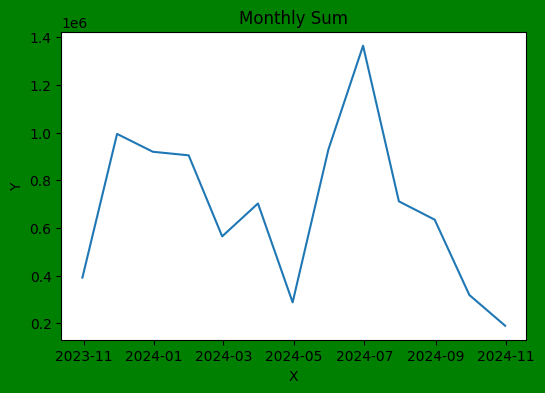

In [28]:
x = monthly_revenue.index
y = monthly_revenue.values

fig = plt.figure(figsize = (6,4), facecolor= 'green')
print(fig)
ax = plt.gca()
ax.plot(x,y)
print(ax)

plt.title("Monthly Sum")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [36]:
groupby_category = df.groupby("Category")

groupby_category['TotalRevenue'].sum().sort_values(ascending= False).head(3)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

In [37]:
groupby_country = df.groupby('Country')
groupby_country['TotalRevenue'].sum().sort_values(ascending= False).head()

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [39]:
groupby_CustomerID = df.groupby('CustomerID')

groupby_CustomerID['TotalRevenue'].sum().sort_values(ascending= False).head()

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [40]:
groupby_CustomerID['Quantity'].sum().sort_values(ascending= False).head()

CustomerID
1007    8
1278    7
1421    7
1141    6
1071    5
Name: Quantity, dtype: int64

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [41]:
groupby_product = df.groupby('Product')
groupby_product['Quantity'].sum().sort_values(ascending= False).head()

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64

In [44]:
groupby_product['Quantity'].mean().sort_values(ascending= False).head(3)

Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

Figure(600x400)
Axes(0.125,0.11;0.775x0.77)


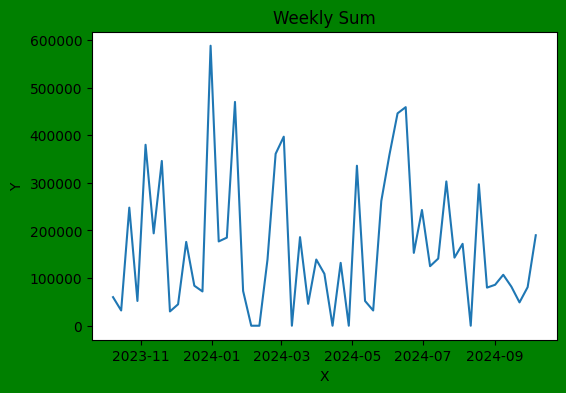

In [46]:
weekly_revenue = order_date.resample('W')['TotalRevenue'].sum()
x = weekly_revenue.index
y = weekly_revenue.values

fig = plt.figure(figsize = (6,4), facecolor= 'green')
print(fig)
ax = plt.gca()
ax.plot(x,y)
print(ax)

plt.title("Weekly Sum")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Figure(600x400)
Axes(0.125,0.11;0.775x0.77)


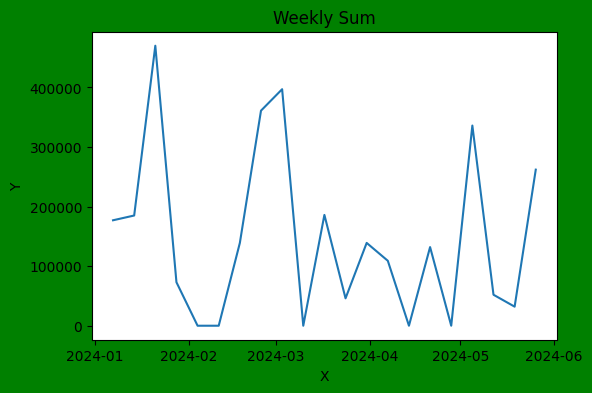

In [52]:
con_weekly_revenue = weekly_revenue.iloc[(weekly_revenue.index <= '2024-06') & (weekly_revenue.index >= '2024-01')]
x = con_weekly_revenue.index
y = con_weekly_revenue.values

fig = plt.figure(figsize = (6,4), facecolor= 'green')
print(fig)
ax = plt.gca()
ax.plot(x,y)
print(ax)

plt.title("Weekly Sum")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [62]:
pivot_df = df.pivot_table(index = 'Country', columns = 'OrderDate', values = 'Quantity')
korea = pivot_df.loc['대한민국']
german = pivot_df.loc['독일']
usa = pivot_df.loc['미국']
japan = pivot_df.loc['일본']
china = pivot_df.loc['중국']


Figure(600x400)
Axes(0.125,0.11;0.775x0.77)


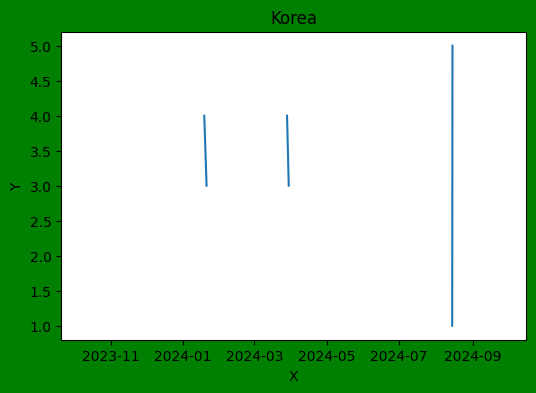

In [70]:
x = korea.index
y = korea.values

fig = plt.figure(figsize = (6,4), facecolor= 'green')
print(fig)
ax = plt.gca()
ax.plot(x,y)
print(ax)

plt.title("Korea")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Figure(600x400)
Axes(0.125,0.11;0.775x0.77)


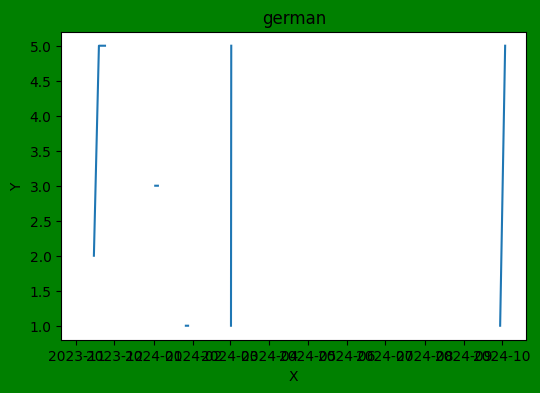

In [69]:
x = german.index
y = german.values

fig = plt.figure(figsize = (6,4), facecolor= 'green')
print(fig)
ax = plt.gca()
ax.plot(x,y)
print(ax)

plt.title("german")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
x = usa.index
y = usa.values

fig = plt.figure(figsize = (6,4), facecolor= 'green')
print(fig)
ax = plt.gca()
ax.plot(x,y)
print(ax)

plt.title("usa")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Figure(600x400)
Axes(0.125,0.11;0.775x0.77)


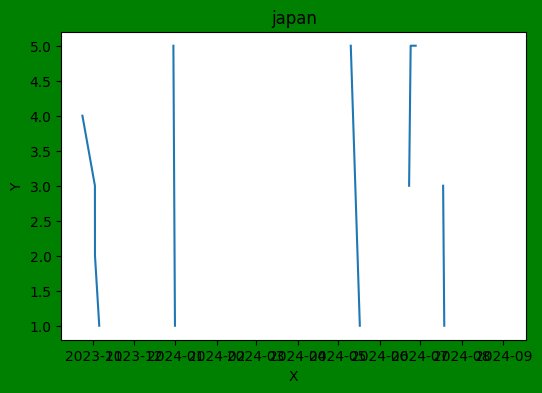

In [68]:
x = japan.index
y = japan.values

fig = plt.figure(figsize = (6,4), facecolor= 'green')
print(fig)
ax = plt.gca()
ax.plot(x,y)
print(ax)

plt.title("japan")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Figure(600x400)
Axes(0.125,0.11;0.775x0.77)


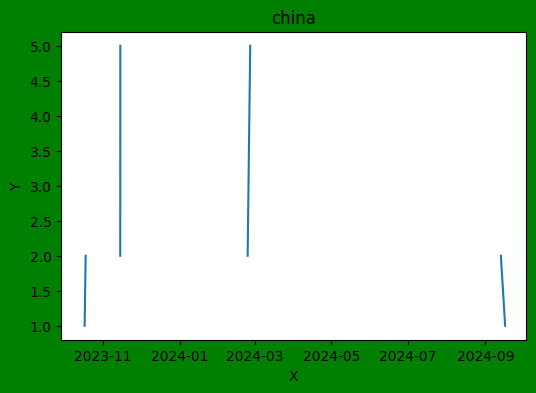

In [67]:
x = china.index
y = china.values

fig = plt.figure(figsize = (6,4), facecolor= 'green')
print(fig)
ax = plt.gca()
ax.plot(x,y)
print(ax)

plt.title("china")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [73]:
order_counts = df.groupby('CustomerID').size()
repurchase = order_counts[order_counts > 1]

print(len(repurchase) / len(order_counts))

0.08108108108108109
